In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

<AxesSubplot:title={'center':'Precipitation: 8/23/16 - 8/23/17'}, xlabel='date'>

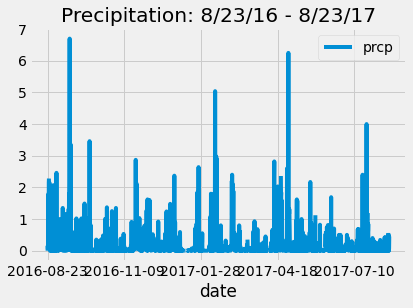

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
Last_Year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
Precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= Last_Year).\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
PrcpTable = pd.DataFrame(Precipitation)
PrcpTable = PrcpTable.set_index('date')
# Sort the dataframe by date
PrcpTable = PrcpTable.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
PrcpTable.plot(title="Precipitation: 8/23/16 - 8/23/17")

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
PrcpTable.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
StationsTtl = session.query(Station).count()
print(f"Station Count: {StationsTtl}")

Station Count: 9


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
StationTotal = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
StationTotal

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
StationID = StationTotal[0][0]
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
temps = session.query(*sel).\
    filter(Measurement.station == StationID).all()
temps

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:title={'center':'Temperature'}, ylabel='Frequency'>

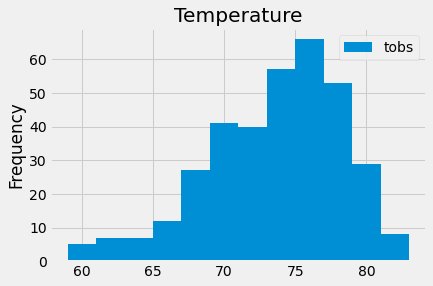

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= Last_Year).\
    filter(Measurement.station == StationID).\
    order_by(Measurement.date).all()

TempTable = pd.DataFrame(Temp_data)
TempTable = TempTable.set_index('date')
TempTable = TempTable.sort_index(ascending=True)
TempTable.plot(kind='hist',title="Temperature", bins=12)

# Close session

In [23]:
# Close Session
session.close()